In [1]:
import numpy as np
import sys
import os
import argparse
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy
import scipy.stats

# # latex rendering
# mpl.rcParams['text.usetex'] = True

plt.rcParams['font.size'] = 15.5
plt.rcParams['axes.labelsize'] = 15.5
plt.rcParams['xtick.labelsize'] = 15.5
plt.rcParams['ytick.labelsize'] = 15.5
plt.rcParams['legend.fontsize'] = 15.5

In [2]:
NaId = [1,376]
numNa = NaId[1] - NaId[0] + 1

SbId = [377,504]
numSb = SbId[1] - SbId[0] + 1

SeId = [505,1016]
numSe = SeId[1] - SeId[0] + 1

# degrees of freedom
dof = 3

In [3]:
# simulation parameters
dt_sim = 0.002;
ss_per_ts = 1
delT = dt_sim * ss_per_ts;

t_tot = 15
total_ts = 7500
num_ss = t_tot / delT + 1
N_delt = int(t_tot / delT)

numAtoms = 1016

print("delT = ", delT)
print("N_delt = ", N_delt)

delT =  0.002
N_delt =  7500


### We first compare the FOM and ROM for the different Potentials

In [4]:
trunc_err = "1e-6"

In [5]:
# print current working directory
print(os.getcwd())

savefig_dir = f"{os.getcwd()}/figs_15ps/msd_across_gamma"
print(savefig_dir)

/data1/yq87/CRISPS/Na3SbSe4-May62024/SIM_15ps_ALLSS
/data1/yq87/CRISPS/Na3SbSe4-May62024/SIM_15ps_ALLSS/figs_15ps/msd_across_gamma


In [6]:
# load data
root = os.getcwd()
pot_label_lst = ['NEP', 'MLIP']
atom_label_lst = ['Na', 'Sb', 'Se']

# load data
msd_data = {}
for pot_label in pot_label_lst:
    msd_data[pot_label] = {}
    for atom_label in atom_label_lst:
        msd_data[pot_label][atom_label] = np.loadtxt(f'{root}/fom_data_15ps/{pot_label}/compute_msd{atom_label}.txt')
        print(msd_data[pot_label][atom_label].shape)

(7501,)
(7501,)
(7501,)
(7501,)
(7501,)
(7501,)


In [7]:
for id, pot_type in enumerate(pot_label_lst):
    for atom_id, atom_type in enumerate(atom_label_lst):
        print("msd_data[", pot_type, "][", atom_type, "].shape = ", msd_data[pot_type][atom_type].shape)
        # print("Last five values of msd_data[", pot_type, "][", atom_type, "] = ", msd_data[pot_type][atom_type])

msd_data[ NEP ][ Na ].shape =  (7501,)
msd_data[ NEP ][ Sb ].shape =  (7501,)
msd_data[ NEP ][ Se ].shape =  (7501,)
msd_data[ MLIP ][ Na ].shape =  (7501,)
msd_data[ MLIP ][ Sb ].shape =  (7501,)
msd_data[ MLIP ][ Se ].shape =  (7501,)


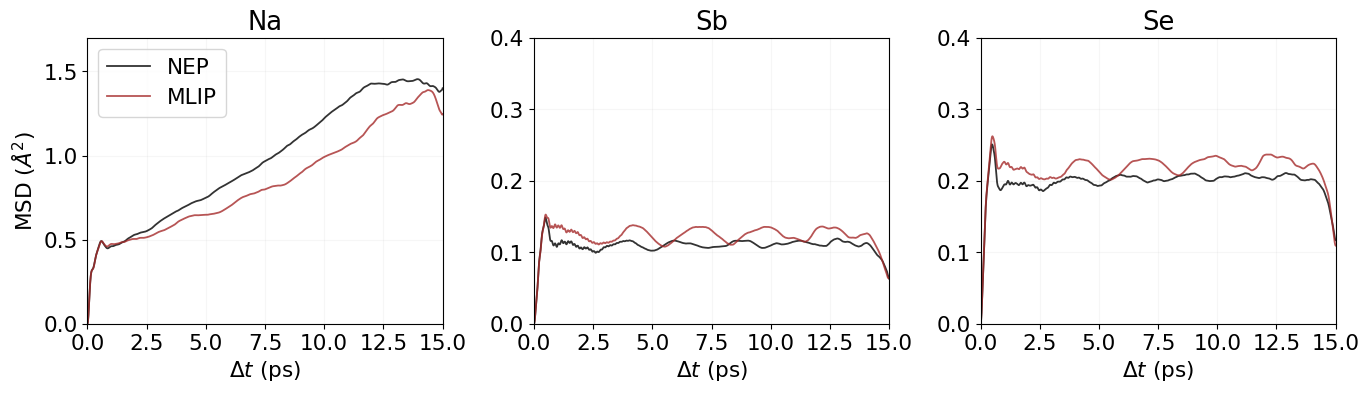

In [8]:
# lets plot the subplots
fig, axs = plt.subplots(1, 3, figsize=(4.7*3, 4.2))

# color cycle
# color_cycle = plt.cm.viridis(np.linspace(0, 1, len(pot_label_lst)))
colors = ['k', 'brown']
# linestyles = ['-', '--']

for id, pot_type in enumerate(pot_label_lst):
    for atom_id, atom_type in enumerate(atom_label_lst):

        time = np.linspace(0, t_tot, N_delt + 1)
        axs[atom_id].plot(time, msd_data[pot_type][atom_type], label=f'{pot_type}', linewidth=1.3, alpha=0.8, color=colors[id])
        axs[atom_id].set_xlabel(r'$\Delta t$ (ps)')
        axs[atom_id].set_title(f'{atom_type}')

        # only set y axis label for the first subplot
        if atom_id == 0:
            axs[atom_id].set_ylabel(r'MSD ($\AA^2$)')
            # set y axis limit
            axs[atom_id].set_ylim([0, 1.7])

        if atom_id == 1:
            # set y axis limit
            axs[atom_id].set_ylim([0, 0.4])

        if atom_id == 2:
            # set y axis limit
            axs[atom_id].set_ylim([0, 0.4])

        # set x axis limit
        axs[atom_id].set_xlim([0, 15])
        # add ticks of 5
        axs[atom_id].set_xticks(np.arange(0, 16, 2.5))
        # add grid
        axs[atom_id].grid(True, alpha=0.1)

        # Add the legend to the first subplot
        if atom_id == 0:
            axs[atom_id].legend(loc='upper left')

# save the figure
plt.tight_layout()
# plt.savefig(f'{savefig_dir}/../msd_FOM_300K.png', dpi=300)

## Comparison between FOM and ROM

In [9]:
# load FOM data
root = os.getcwd()
pot_label_lst = ['NEP', 'MLIP']
atom_label_lst = ['Na', 'Sb', 'Se']

# load data
msd_data = {}
for pot_label in pot_label_lst:
    msd_data[pot_label] = {}
    for atom_label in atom_label_lst:
        msd_data[pot_label][atom_label] = np.loadtxt(f'{root}/fom_data_15ps/{pot_label}/compute_msd{atom_label}.txt')

In [10]:
# load ROM data for comparison
root = os.getcwd()
ROM_MOM_folderdir = f"{root}/rom_data_15ps/ROM_NVT_{trunc_err}"

foldername_MOM_Lst = ["1e-5", "0"]
label_weightCoeffSym_lst = [r'$1e^{-5}$', '0']

pot_label_lst = ['NEP', 'MLIP']
atom_label_lst = ['Na', 'Sb', 'Se']

In [11]:
msd_data_ROM_ALL_lst = []
msd_data_ROM_Global_ALL_lst = []

# we first get the MOM data
for id_folder, folder_name in enumerate(foldername_MOM_Lst):
    print("Current folder name: ", folder_name)
    # load data
    msd_data_ROM = {}
    msd_data_ROM_Global = {}

    for pot_label in pot_label_lst:
        msd_data_ROM[pot_label] = {}
        print("Current pot label: ", pot_label)
        for atom_label in atom_label_lst:
            # load text data, if null fill with 0
            print("Curr atom label: ", atom_label)
            # print(f'{ROM_MOM_folderdir}/gamma_{folder_name}/{pot_label}/msd{atom_label}.data')
            msd_data_npy = np.genfromtxt(f'{ROM_MOM_folderdir}/gamma_{folder_name}/{pot_label}/compute_msd{atom_label}.txt', invalid_raise=False, filling_values=0)
            # print rows where the data is invalid
            # print("Invalid rows = ", np.where(msd_data_npy == 0))
            msd_data_ROM[pot_label][atom_label] = msd_data_npy
        print("#################")

    # load Global data
    for pot_label in pot_label_lst:
        msd_data_ROM_Global[pot_label] = {}
        print("Current Global pot label: ", pot_label)
        for atom_label in atom_label_lst:
            # load text data, if null fill with 0
            print("Curr atom label: ", atom_label)
            msd_data_Global_npy = np.genfromtxt(f'{ROM_MOM_folderdir}/gamma_{folder_name}/Global/{pot_label}/compute_msd{atom_label}.txt', invalid_raise=False, filling_values=0)
            # print rows where the data is invalid
            # print("Invalid rows = ", np.where(msd_data_Global_npy == 0))
            msd_data_ROM_Global[pot_label][atom_label] = msd_data_Global_npy
        print("#################")

    # store the data
    msd_data_ROM_ALL_lst.append(msd_data_ROM)
    msd_data_ROM_Global_ALL_lst.append(msd_data_ROM_Global)
print("Number of MOM data collected: ", len(msd_data_ROM_ALL_lst))
print("Number of MOM Global data collected: ", len(msd_data_ROM_Global_ALL_lst))

Current folder name:  1e-5
Current pot label:  NEP
Curr atom label:  Na
Curr atom label:  Sb
Curr atom label:  Se
#################
Current pot label:  MLIP
Curr atom label:  Na
Curr atom label:  Sb
Curr atom label:  Se
#################
Current Global pot label:  NEP
Curr atom label:  Na
Curr atom label:  Sb
Curr atom label:  Se
#################
Current Global pot label:  MLIP
Curr atom label:  Na
Curr atom label:  Sb
Curr atom label:  Se
#################
Current folder name:  0
Current pot label:  NEP
Curr atom label:  Na
Curr atom label:  Sb
Curr atom label:  Se
#################
Current pot label:  MLIP
Curr atom label:  Na
Curr atom label:  Sb
Curr atom label:  Se
#################
Current Global pot label:  NEP
Curr atom label:  Na
Curr atom label:  Sb
Curr atom label:  Se
#################
Current Global pot label:  MLIP
Curr atom label:  Na
Curr atom label:  Sb
Curr atom label:  Se
#################
Number of MOM data collected:  2
Number of MOM Global data collected:  2


In [12]:
# # lets plot of subplots for 1 potential
# fig, axs = plt.subplots(1, 3, figsize=(4.8*3, 4.3))

# # color cycle for x num models
# colors = ['blue', 'green', 'purple', 'orange', 'pink', 'gray', 'olive', 'cyan']
# pot_type = 'NEP'

# for atom_id, atom_type in enumerate(atom_label_lst):
#     # FOM
#     axs[atom_id].plot(msd_data[pot_type][atom_type][:numSS_15ps, 0] * dt_sim, msd_data[pot_type][atom_type][:numSS_15ps, -1], 
#                       label=f'{pot_type}', linewidth=1.3, color="k")
#     ### MOM data
#     for id_MOM_folder, folder_name in enumerate(foldername_MOM_Lst):
#         # ROM
#         # axs[atom_id].plot(msd_data_ROM_ALL_lst[id_MOM_folder][pot_type][atom_type][:, 0] * dt_sim, msd_data_ROM_ALL_lst[id_MOM_folder][pot_type][atom_type][:, -1], label=f'ROM {folder_name}', linewidth=1, alpha=0.8, color=colors(id_folder+1))
#         # Global
#         axs[atom_id].plot(msd_data_ROM_Global_ALL_lst[id_MOM_folder][pot_type][atom_type][:, 0] * dt_sim, msd_data_ROM_Global_ALL_lst[id_MOM_folder][pot_type][atom_type][:, -1], 
#                           label=rf'g-ROM $\gamma=${label_weightCoeffSym_lst[id_MOM_folder]}', linewidth=1, alpha=0.8, color=colors[id_MOM_folder], linestyle='--')
#     axs[atom_id].set_xlabel('Time (ps)')
#     axs[atom_id].set_title(f'{atom_type}')
#     # axs[atom_id].legend(fontsize=9)

#     # only set y axis label for the first subplot
#     if atom_id == 0:
#         axs[atom_id].set_ylabel(r'MSD ($\AA^2$)')
#         # set y axis limit
#         axs[atom_id].set_ylim([0, 1.6])

#     if atom_id == 1:
#         # set y axis limit
#         axs[atom_id].set_ylim([0, 0.1])

#     if atom_id == 2:
#         # set y axis limit
#         axs[atom_id].set_ylim([0, 0.2])

#     # set x axis limit
#     axs[atom_id].set_xlim([0, 15])
#     # add ticks of 5
#     axs[atom_id].set_xticks(np.arange(0, 16, 2.5))
#     # add grid
#     axs[atom_id].grid(True, alpha=0.1)

#     # Add the legend to the last subplot
#     if atom_id == 0:
#         axs[atom_id].legend(fontsize=9, loc='upper left', framealpha=0.3)

# # save the figure
# plt.tight_layout()
# # plt.savefig(f'{savefig_dir}/msd_FOM_ROM_Global_{pot_type}_eps{trunc_err}.png', dpi=300)


# # ################# MLIP ##################
# # lets plot of subplots for 1 potential
# fig, axs = plt.subplots(1, 3, figsize=(4.8*3, 4.3))

# pot_type = 'MLIP'

# for atom_id, atom_type in enumerate(atom_label_lst):
#     # FOM
#     axs[atom_id].plot(msd_data[pot_type][atom_type][:numSS_15ps, 0] * dt_sim, msd_data[pot_type][atom_type][:numSS_15ps, -1], 
#                       label=f'{pot_type}', linewidth=1.3, color="brown")
#     ### MOM data
#     for id_MOM_folder, folder_name in enumerate(foldername_MOM_Lst):
#         # ROM
#         # axs[atom_id].plot(msd_data_ROM_ALL_lst[id_MOM_folder][pot_type][atom_type][:, 0] * dt_sim, msd_data_ROM_ALL_lst[id_MOM_folder][pot_type][atom_type][:, -1], 
#         #                   label=f'ROM {folder_name}', linewidth=1, alpha=0.8, color=colors(id_folder+1))
#         # Global
#         axs[atom_id].plot(msd_data_ROM_Global_ALL_lst[id_MOM_folder][pot_type][atom_type][:, 0] * dt_sim, msd_data_ROM_Global_ALL_lst[id_MOM_folder][pot_type][atom_type][:, -1], 
#                           label=rf'g-ROM $\gamma=${label_weightCoeffSym_lst[id_MOM_folder]}', linewidth=1, alpha=0.8, color=colors[id_MOM_folder], linestyle='--')
#     axs[atom_id].set_xlabel('Time (ps)')
#     axs[atom_id].set_title(f'{atom_type}')
#     # axs[atom_id].legend(fontsize=9)

#     # only set y axis label for the first subplot
#     if atom_id == 0:
#         axs[atom_id].set_ylabel(r'MSD ($\AA^2$)')
#         # set y axis limit
#         axs[atom_id].set_ylim([0, 1.6])

#     if atom_id == 1:
#         # set y axis limit
#         axs[atom_id].set_ylim([0, 0.1])

#     if atom_id == 2:
#         # set y axis limit
#         axs[atom_id].set_ylim([0, 0.2])

#     # set x axis limit
#     axs[atom_id].set_xlim([0, 15])
#     # add ticks of 5
#     axs[atom_id].set_xticks(np.arange(0, 16, 2.5))
#     # add grid
#     axs[atom_id].grid(True, alpha=0.1)

#     # Add the legend to the last subplot
#     if atom_id == 0:
#         axs[atom_id].legend(fontsize=9, loc='upper left', framealpha=0.3)

# # save the figure
# plt.tight_layout()
# # plt.savefig(f'{savefig_dir}/msd_FOM_ROM_Global_{pot_type}_eps{trunc_err}.png', dpi=300)

In [13]:
# fig, axs = plt.subplots(1, 2, figsize=(5.2*2, 4.7))

# # color cycle for x num models
# colors = ['blue', 'green', 'purple', 'orange', 'pink', 'gray', 'olive', 'cyan']
# pot_types = ['NEP', 'MLIP']
# # line_styles = ['-', '--', '-.', ':', (0, (3, 10, 1, 10)), (0, (3, 1, 1, 1)), (0, (3, 5, 1, 5)), (0, (3, 1, 1, 1, 1, 1))]

# labels = []
# lines = []

# for ax_id, pot_type in enumerate(pot_types):
#     atom_id = 0  # first atom
#     atom_type = atom_label_lst[atom_id]
#     # FOM
#     line, = axs[ax_id].plot(msd_data[pot_type][atom_type][:numSS_15ps, 0] * dt_sim, msd_data[pot_type][atom_type][:numSS_15ps, -1], 
#                     linewidth=1.3, color="k" if pot_type == 'NEP' else "brown", linestyle='-')
#     if pot_type not in labels:
#         labels.append(pot_type)
#         lines.append(line)

# for id_MOM_folder, folder_name in enumerate(foldername_MOM_Lst):
#     for ax_id, pot_type in enumerate(pot_types):
#         atom_id = 0  # first atom
#         atom_type = atom_label_lst[atom_id]
#         line, = axs[ax_id].plot(msd_data_ROM_Global_ALL_lst[id_MOM_folder][pot_type][atom_type][:, 0] * dt_sim, msd_data_ROM_Global_ALL_lst[id_MOM_folder][pot_type][atom_type][:, -1], 
#                         linewidth=1, alpha=0.8, color=colors[id_MOM_folder], linestyle='--')
#         label = rf'g-ROM $\gamma=${label_weightCoeffSym_lst[id_MOM_folder]}'
#         if label not in labels:
#             labels.append(label)
#             lines.append(line)

# axs[0].set_xlabel('Time (ps)')
# axs[0].set_ylabel(r'MSD ($\AA^2$)')
# axs[0].set_ylim([0, 1.6])
# axs[0].set_xlim([0, 15])
# axs[0].set_xticks(np.arange(0, 16, 2.5))
# axs[0].grid(True, alpha=0.1)
# axs[0].set_title(f'{atom_type} - {pot_types[0]}')

# axs[1].set_xlabel('Time (ps)')
# # axs[1].set_ylabel(r'MSD ($\AA^2$)')
# axs[1].set_ylim([0, 1.6])
# axs[1].set_xlim([0, 15])
# axs[1].set_xticks(np.arange(0, 16, 2.5))
# axs[1].grid(True, alpha=0.1)
# axs[1].set_title(f'{atom_type} - {pot_types[1]}')

# # Create a single legend below the plots
# fig.legend(lines, labels, loc='upper center', ncol=4, bbox_to_anchor=(0.52, 0.15), frameon=True)

# # Adjust layout to make room for the legend
# plt.tight_layout(rect=[0, 0.1, 1, 1])
# # plt.savefig(f'{savefig_dir}/msd_FOM_ROM_Na_Global_eps{trunc_err}.png', dpi=300, bbox_inches='tight')

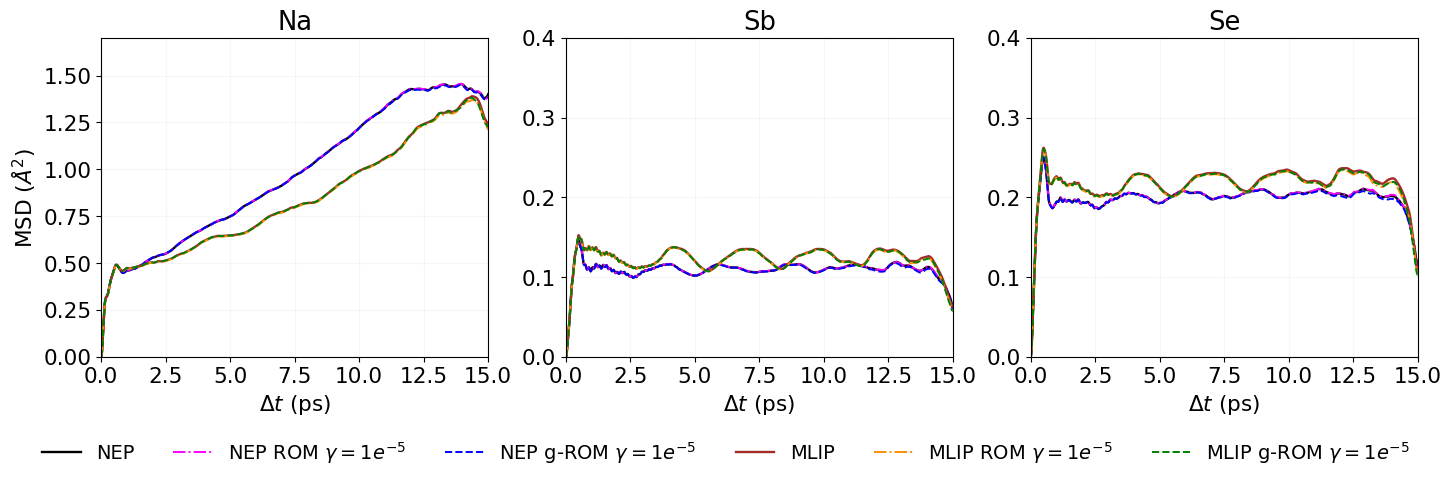

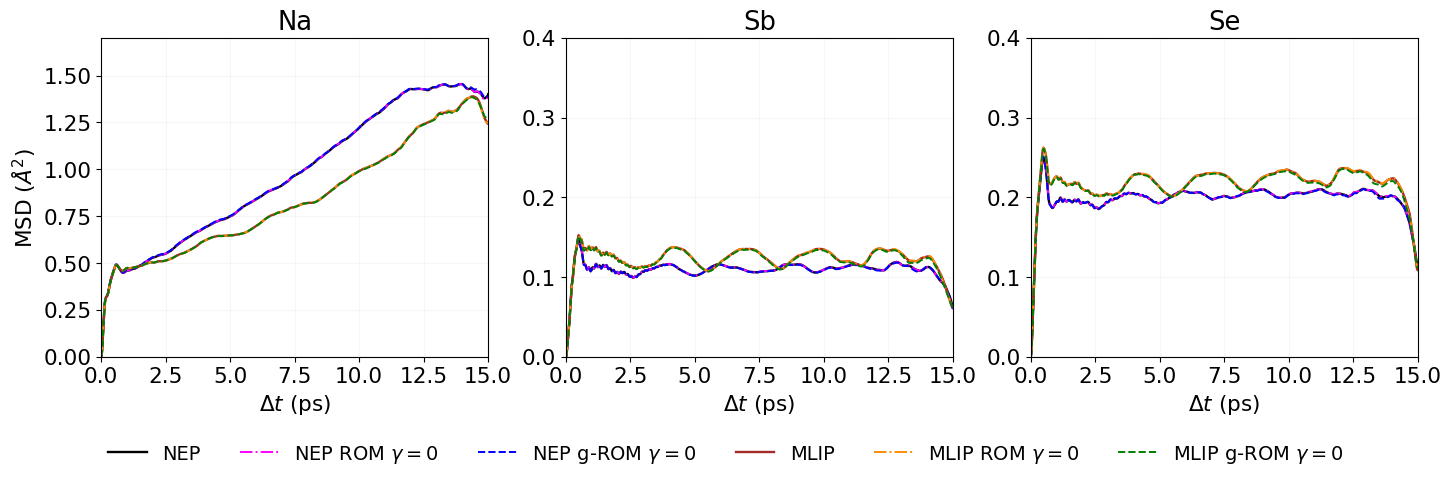

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming all other variables (msd_data, etc.) are defined elsewhere
for id_folder, folder_name in enumerate(foldername_MOM_Lst):
    # Enable constrained_layout
    fig, axs = plt.subplots(1, 3, figsize=(4.8*3, 4.15), constrained_layout=True)
    # colors = ['darkolivegreen', 'deeppink', 'blue', 'green', 'purple', 'darkorange', 'deepskyblue', 'olive']
    colors = ['magenta', 'darkorange', 'blue', 'green']
    colors_FOM = ['k', 'brown']

    lines = []
    labels = []

    time = np.linspace(0, t_tot, N_delt + 1)

    for id, pot_type in enumerate(pot_label_lst):
        for atom_id, atom_type in enumerate(atom_label_lst):
            line_FOM, = axs[atom_id].plot(time, msd_data[pot_type][atom_type],
                                          label=f'{pot_type}', linewidth=1.7, color=colors_FOM[id])
            line_ROM, = axs[atom_id].plot(time, msd_data_ROM_ALL_lst[id_folder][pot_type][atom_type],
                                          label=rf'{pot_type} ROM $\gamma=${label_weightCoeffSym_lst[id_folder]}', linewidth=1.4, alpha=1, linestyle='dashdot', color=colors[-4+id])
            line_gROM, = axs[atom_id].plot(time, msd_data_ROM_Global_ALL_lst[id_folder][pot_type][atom_type],
                                           label=rf'{pot_type} g-ROM $\gamma=${label_weightCoeffSym_lst[id_folder]}', linewidth=1.4, alpha=1, color=colors[-2+id], linestyle='--')
            axs[atom_id].set_xlabel(r'$\Delta t$ (ps)')
            axs[atom_id].set_title(f'{atom_type}')
            axs[atom_id].set_xlim([0, 15])
            axs[atom_id].set_xticks(np.arange(0, 16, 2.5))
            axs[atom_id].grid(True, alpha=0.1)

        axs[0].set_ylim([0, 1.7])
        axs[1].set_ylim([0, 0.4])
        axs[2].set_ylim([0, 0.4])
        axs[0].set_ylabel(r'MSD ($\AA^2$)')

        lines.extend([line_FOM, line_ROM, line_gROM])
        labels.extend([f'{pot_type}', rf'{pot_type} ROM $\gamma=${label_weightCoeffSym_lst[id_folder]}', rf'{pot_type} g-ROM $\gamma=${label_weightCoeffSym_lst[id_folder]}'])

    # Add legend outside of plots
    fig.legend(lines, labels, loc='lower center', ncol=6, bbox_to_anchor=(0.5, -0.15), frameon=False, fontsize=14)

    # Remove plt.tight_layout() if using constrained_layout
    plt.savefig(f'{savefig_dir}/msd_FOM_ROM_Global_eps{trunc_err}_gam{folder_name}.png', dpi=300, bbox_inches='tight')

In [68]:
# # plot all of the folders individually, and the last being the without MOM
# for id_folder, folder_name in enumerate(foldername_MOM_Lst):
#     # lets plot of subplots for 1 potential
#     fig, axs = plt.subplots(1, 3, figsize=(4.8*3, 4.3))
#     colors = ['blue', 'green', 'purple', 'orange', 'pink', 'gray', 'olive', 'cyan']
#     colors_FOM = ['k', 'brown']

#     for id, pot_type in enumerate(pot_label_lst):
#         for atom_id, atom_type in enumerate(atom_label_lst):
#             # FOM
#             axs[atom_id].plot(msd_data[pot_type][atom_type][:numSS_15ps, 0] * dt_sim, msd_data[pot_type][atom_type][:numSS_15ps, -1], 
#                               label=f'{pot_type}', linewidth=1.3, color=colors_FOM[id])
#             ### MOM data
#             # ROM
#             axs[atom_id].plot(msd_data_ROM_ALL_lst[id_folder][pot_type][atom_type][:, 0] * dt_sim, msd_data_ROM_ALL_lst[id_folder][pot_type][atom_type][:, -1],
#                                label=rf'{pot_type} ROM $\gamma=${label_weightCoeffSym_lst[id_folder]}', linewidth=1, alpha=1, linestyle='-')
#             # Global
#             axs[atom_id].plot(msd_data_ROM_Global_ALL_lst[id_folder][pot_type][atom_type][:, 0] * dt_sim, msd_data_ROM_Global_ALL_lst[id_folder][pot_type][atom_type][:, -1], 
#                               label=rf'{pot_type} g-ROM $\gamma=${label_weightCoeffSym_lst[id_folder]}', linewidth=1, alpha=0.8, color=colors[-2+id], linestyle='--')


#             axs[atom_id].set_xlabel('Time (ps)')
#             axs[atom_id].set_title(f'{atom_type}')
#             # axs[atom_id].legend(fontsize=9)

#             # only set y axis label for the first subplot
#             if atom_id == 0:
#                 axs[atom_id].set_ylabel(r'MSD ($\AA^2$)')
#                 # set y axis limit
#                 axs[atom_id].set_ylim([0, 1.6])

#             if atom_id == 1:
#                 # set y axis limit
#                 axs[atom_id].set_ylim([0, 0.1])

#             if atom_id == 2:
#                 # set y axis limit
#                 axs[atom_id].set_ylim([0, 0.2])

#             # set x axis limit
#             axs[atom_id].set_xlim([0, 15])
#             # add ticks of 5
#             axs[atom_id].set_xticks(np.arange(0, 16, 2.5))
#             # add grid
#             axs[atom_id].grid(True, alpha=0.1)

#             # Add the legend to the last subplot
#             if atom_id == 0:
#                 axs[atom_id].legend(fontsize=10.3, loc='upper left')

#     # save the figure
#     plt.tight_layout()
#     # plt.savefig(f'{savefig_dir}/msd_FOM_ROM_Global_eps{trunc_err}_gam{folder_name}.png', dpi=300)